# This script trains a neural network model to classify images of clothing, like sneakers and shirts. (mnist fashion data set is used)

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
''' tf.keras api is being used. '''

' tf.keras api is being used. '

In [4]:
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.9.0


In [ ]:
!pip3 install update tensorflow

    100% |████████████████████████████████| 83.1MB 7.6kB/s ta 0:00:01  7% |██▍                             | 6.3MB 1.9MB/s eta 0:00:41    45% |██████████████▌                 | 37.6MB 792kB/s eta 0:00:58    93% |██████████████████████████████  | 77.7MB 1.3MB/s eta 0:00:05
  Using cached https://files.pythonhosted.org/packages/73/fb/00a976f728d0d1fecfe898238ce23f502a721c0ac0ecfedb80e0d88c64e9/six-1.12.0-py2.py3-none-any.whl
    100% |████████████████████████████████| 51kB 688kB/s ta 0:00:01
    100% |████████████████████████████████| 3.1MB 146kB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/c2/f9/28787754923612ca9bfdffc588daa05580ed70698add063a5629d1a4209d/protobuf-3.6.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/ff/7f/9d804d2348471c67a7d8b5f84f9bc59fd1cefa148986f2b74552f8573555/numpy-1.15.4-cp36-cp36m-manylinux1_x86_64.whl
    100% |████████████████████████████████| 10.1MB 60kB/s eta 0:00:01   43% |██████████████       

MNIST fashion dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels).
Link : https://github.com/zalandoresearch/fashion-mnist

Tensorflow api to load these data was showing some gzip error.
The approach followed here is, download the original dataset from "https://github.com/zalandoresearch/fashion-mnist" and follow https://pjreddie.com/projects/mnist-in-csv/ to convert the dataset into csv format.

In [29]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [32]:
import pandas as pd
train_df = pd.read_csv('data/fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('data/fashion-mnist_test.csv', sep = ',')

In [33]:
train_df.shape

(60000, 785)

In [34]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
train_data = np.array(train_df, dtype = 'float32')
test_data = np.array(test_df, dtype = 'float32')

Now let us slice the train arrays into x and y arrays namely x_train,y_train to store all image data and label data respectively. i.e

x_train contains all the rows and all columns except the label column and excluding header info .
y_train contains all the rows and first column and excluding header info .

Similarly slice the test arrays into x and y arrays namely x_train,y_train to store all image data and label data respectively. i.e

x_test contains all the rows and all columns except the label column and excluding header info .
y_test contains all the rows and first column and excluding header info .

We scale the pixel values to a range of 0 to 1 before feeding to the neural network model. (presently they are from 0-255 as shown above)

In [60]:
x_train = train_data[:,1:]/255

y_train = train_data[:,0]

x_test= test_data[:,1:]/255

y_test=test_data[:,0]

sample image check

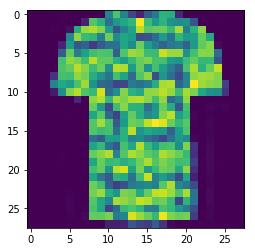

In [45]:
image = x_train[3,:].reshape((28,28))
plt.imshow(image)
plt.show()

In [50]:
class_names[y_train[3].astype(int)]

'T-shirt/top'

The first 25 images from the training set and display the class name below each image. Just for a verification purpose

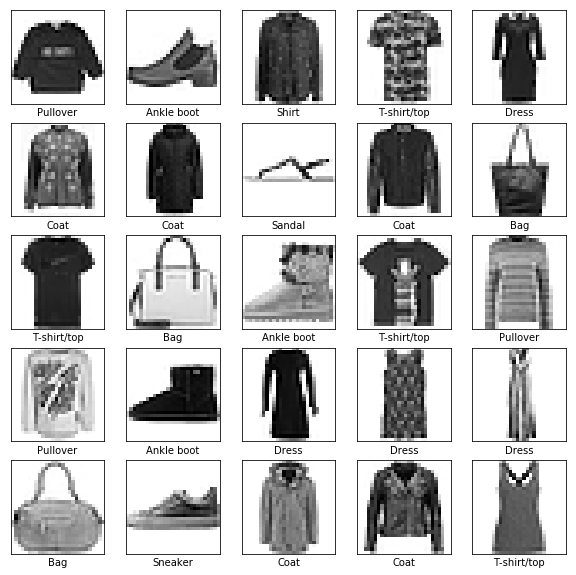

In [53]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i,:].reshape((28,28)), cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i].astype(int)])

# Model building

The basic building block of a neural network is the layer. Layers extract representations from the data fed into them.

In [63]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(784,)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [66]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [67]:
x_train[0].shape

(784,)

Training the neural network model requires the following steps:

-Feed the training data to the model—in this example, the train_images and train_labels arrays.

-The model learns to associate images and labels.

-We ask the model to make predictions about a test set—in this example, the test_images array. We verify that the predictions match the labels from the test_labels array.

In [70]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 13s 219us/step - loss: 0.2034 - acc: 0.9246
Epoch 2/10
60000/60000 [==============================] - 12s 200us/step - loss: 0.1981 - acc: 0.9251
Epoch 3/10
60000/60000 [==============================] - 13s 219us/step - loss: 0.1919 - acc: 0.9274
Epoch 4/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.1845 - acc: 0.9300
Epoch 5/10
60000/60000 [==============================] - 13s 216us/step - loss: 0.1818 - acc: 0.9318
Epoch 6/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.1788 - acc: 0.9329
Epoch 7/10
60000/60000 [==============================] - 13s 219us/step - loss: 0.1751 - acc: 0.9340
Epoch 8/10
60000/60000 [==============================] - 12s 201us/step - loss: 0.1675 - acc: 0.9373
Epoch 9/10
60000/60000 [==============================] - 13s 219us/step - loss: 0.1667 - acc: 0.9367
Epoch 10/10
60000/60000 [==============================] - 12s 194us/step - loss: 

In [71]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

10000/10000 [==============================] - 1s 52us/step
Test accuracy: 0.8963
Test loss: 0.3374745888918638


# Prediction

In [72]:
predictions = model.predict(x_test[:25])
predictions[0]

array([9.8217320e-01, 2.3727591e-13, 2.5931039e-04, 4.6269720e-06,
       3.5323716e-05, 3.3028324e-16, 1.7527398e-02, 8.7063337e-13,
       2.3002936e-08, 4.6237753e-13], dtype=float32)

A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing. We can see which label has the highest confidence value

In [74]:
class_names[np.argmax(predictions[0])]

'T-shirt/top'

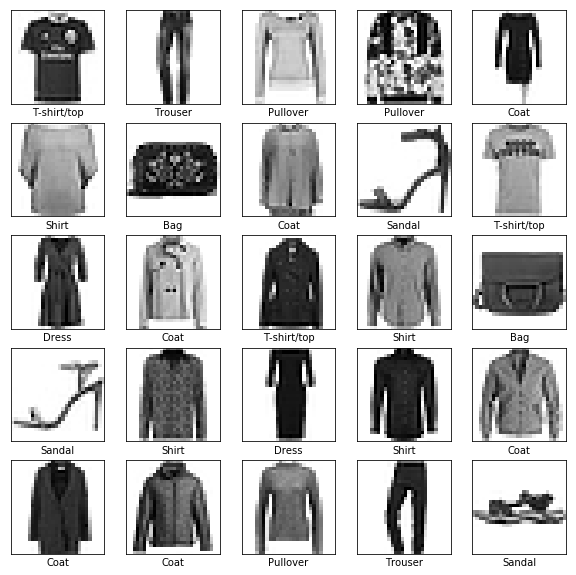

In [76]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i,:].reshape((28,28)), cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(predictions[i])])